# Visual and Data Analysis - FIFA 19 Players
- **Created by Andrés Segura Tinoco**
- **Created on May 1, 2019**

# 2. Querying Data
## Loading main libraries and data

In [1]:
# Load the Pandas libraries
import pandas as pd
import pandasql as ps
import numpy as np

In [2]:
# Load visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

In [3]:
# Read FIFA 19 players raw data
dataURL = "https://raw.githubusercontent.com/ansegura7/DataScience_FIFA19Data/master/data/fifa19_overall_data.csv"
data = pd.read_csv(dataURL)

In [4]:
# Preview the first 5 lines of the loaded data
data.head()

,Order,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause €
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0


## Exploring data using pandasql

In [5]:
# Top n rows
nTop = 10

In [6]:
# Query data: Countries with more players
query = """SELECT [Nationality], COUNT(*) AS [count]
             FROM data
            WHERE [Nationality] IS NOT NULL
            GROUP BY [Nationality] ORDER BY [count] DESC"""
playerByCountries = ps.sqldf(query, locals())

In [7]:
# Show first 10 countries with more players in FIFA 19
playerByCountries.head(nTop)

,Nationality,count
0,England,1662
1,Germany,1198
2,Spain,1072
3,Argentina,937
4,France,914
5,Brazil,827
6,Italy,702
7,Colombia,618
8,Japan,478
9,Netherlands,453


In [8]:
# Query data: Best players
query = """SELECT [Name], [Overall]
            FROM data
           ORDER BY [Overall] DESC"""
bestPlayers = ps.sqldf(query, locals())

In [9]:
# Show first 10 best players
bestPlayers.head(nTop)

,Name,Overall
0,L. Messi,94
1,Cristiano Ronaldo,94
2,Neymar Jr,92
3,De Gea,91
4,K. De Bruyne,91
5,E. Hazard,91
6,L. Modrić,91
7,L. Suárez,91
8,Sergio Ramos,91
9,J. Oblak,90


In [10]:
# Query data: Players with more Potential
query = """SELECT [Name], [Potential]
             FROM data
            ORDER BY [Potential] DESC"""
bestPotential = ps.sqldf(query, locals())

In [11]:
# Show first 10 players with more potential
bestPotential.head(nTop)

,Name,Potential
0,K. Mbappé,95
1,L. Messi,94
2,Cristiano Ronaldo,94
3,P. Dybala,94
4,Neymar Jr,93
5,De Gea,93
6,J. Oblak,93
7,G. Donnarumma,93
8,K. De Bruyne,92
9,M. ter Stegen,92


In [12]:
# Query data: Players with more real potential - Improvement Margen
query = """SELECT [Name], [Overall] AS [CurrentOverall], ([Potential] - [Overall]) AS [RealPotential], [Value €]
             FROM data
            WHERE [Overall] > 80
            ORDER BY [RealPotential] DESC"""
realPotential = ps.sqldf(query, locals())

In [13]:
# Show first 10 players with more improvement margen
realPotential.head(nTop)

,Name,CurrentOverall,RealPotential,Value €
0,G. Donnarumma,82,11,29000000.0
1,O. Dembélé,83,9,40000000.0
2,Gabriel Jesus,83,9,41000000.0
3,M. de Ligt,82,9,27000000.0
4,Kepa,83,8,28500000.0
5,Arthur,82,8,32500000.0
6,M. Rashford,81,8,27000000.0
7,L. Bailey,81,8,26500000.0
8,F. de Jong,81,8,26000000.0
9,Fabián,81,8,26000000.0


In [14]:
# Query data: Players Overall Average per Club
query = """SELECT [Club], AVG([Overall]) AS [AvgOverall]
             FROM data
            WHERE [Club] IS NOT NULL
            GROUP BY [Club]
            ORDER BY [AvgOverall] DESC"""
avgOverallPerClub = ps.sqldf(query, locals())

In [15]:
# Show first 10 clubs with more players overall
avgOverallPerClub.head(nTop)

,Club,AvgOverall
0,Juventus,82.280000
1,Napoli,80.000000
2,Inter,79.750000
3,Real Madrid,78.242424
4,Milan,78.074074
5,FC Barcelona,78.030303
6,Paris Saint-Germain,77.433333
7,Roma,77.423077
8,Manchester United,77.242424
9,FC Bayern München,77.000000


In [16]:
# Query data: Players Overall Average per Club
query = """SELECT [Club], AVG([Potential]) AS [AvgPotential]
             FROM data
            WHERE [Club] IS NOT NULL
            GROUP BY [Club]
            ORDER BY [AvgPotential] DESC"""
avgPotentialPerClub = ps.sqldf(query, locals())

In [17]:
# Show first 10 clubs with more players potential
avgPotentialPerClub.head(nTop)

,Club,AvgPotential
0,Juventus,85.520000
1,FC Barcelona,85.303030
2,Real Madrid,84.636364
3,Manchester City,83.909091
4,FC Bayern München,83.655172
5,Paris Saint-Germain,83.566667
6,Napoli,83.440000
7,Manchester United,82.666667
8,Chelsea,82.636364
9,Milan,82.555556


## Grouping Data and Visualization

In [18]:
# Loading FIFA 19 positions dataset
dataURL = "https://raw.githubusercontent.com/ansegura7/DataScience_FIFA19Data/master/data/fifa19_positions.csv"
positions = pd.read_csv(dataURL)

In [19]:
# Preview the first 5 lines of the loaded data
positions.head()

,Position,Description,Zone
0,GK,Goal Keper,GoalKeper
1,CB,Centre Back,Defense
2,LCB,Left Centre Back,Defense
3,RCB,Right Centre Back,Defense
4,LB,Left Back,Defense


In [20]:
# Grouping data by Position
posData = data.groupby("Position").count()
posData = posData.sort_values(by = "Order", ascending = True)

# Create horizontal bar chart data
bars = posData.index
y_pos = np.arange(len(bars))
values = posData["Order"].values

In [21]:
# Palette by positions dictionary
posPalette = dict()
posPalette["GoalKeper"] = "#dc3912"
posPalette["Defense"] = "#3366cc"
posPalette["Midfield"] = "#ff9900"
posPalette["Attack"] = "#109618"

# Colors by positions dictionary
posColors = dict()
for ix in range(len(positions)):
    pos = positions.Position[ix]
    zone = positions.Zone[ix] 
    posColors[pos] = posPalette[zone]

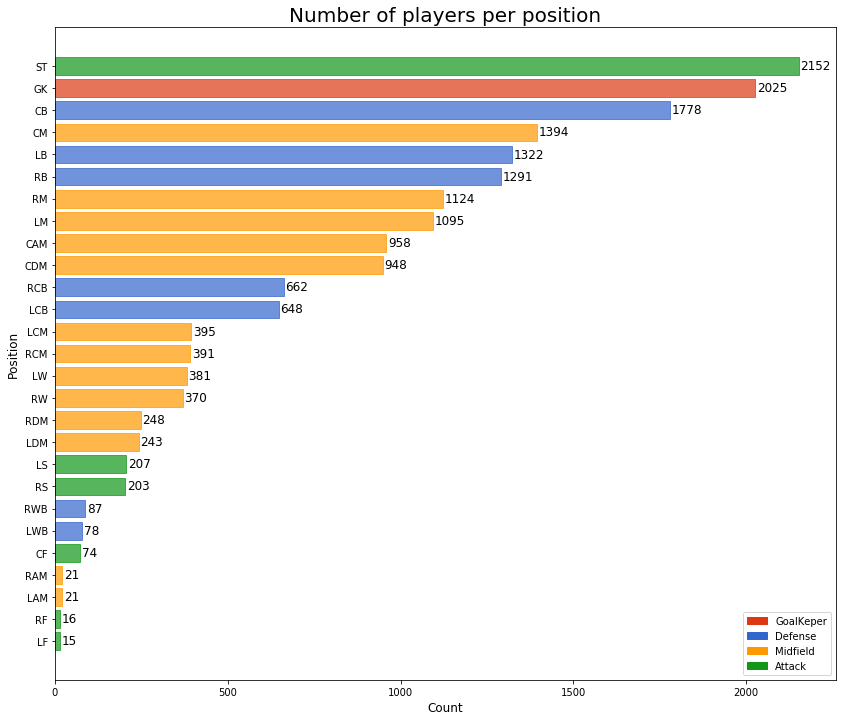

In [22]:
# Set up the matplotlib figure
fig, ax0 = plt.subplots(figsize = (14, 12))

# Horizontal barchart
barlist = plt.barh(y_pos, values, alpha = 0.7)
plt.yticks(y_pos, bars)
plt.title("Number of players per position", fontsize = 20)

# Add bar labels
for i, v in enumerate(values):
    ax0.text(v + 5, i - .15, str(v), color = "black", fontweight = "normal", fontsize = 12)
    barlist[i].set_color(posColors[bars[i]])

# Add custom legend
gk_patch = mpatches.Patch(color = "#dc3912", label = "GoalKeper")
df_patch = mpatches.Patch(color = "#3366cc", label = "Defense")
mf_patch = mpatches.Patch(color = "#ff9900", label = "Midfield")
at_patch = mpatches.Patch(color = "#109618", label = "Attack")
plt.legend(handles=[gk_patch, df_patch, mf_patch, at_patch])

# Plot setup
plt.xlabel("Count", fontsize = 12)
plt.ylabel("Position", fontsize = 12)
plt.show()

---
<a href="https://github.com/ansegura7/DataScience_FIFA19Data">&laquo; GitHub Repository</a>